# Visualize motivational figure

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
def plot_moons(data, labels, sensitive):
    # plotting function
    colors = ['lightblue','firebrick','midnightblue','dimgray','lightcoral','teal','cadetblue','indianred','lavender']
    colors = ['#648fff','#dc267f','#fe6100','#785ef0']
    results = []
    algorithms = list(labels.keys())
    sens_col = []
    for algo in algorithms:
        results.extend([[sample[0], sample[1], label, algo] for (sample, label) in zip(data, labels[algo])])
        sens_col.extend(sensitive)

    edge_lst = ['black' for _ in sens_col]
    df_res = pd.DataFrame(results, columns=["x-axis","y-axis","Label","Algorithm"])
    df_res["Sensitive Group"] = sens_col
    markers = {0: "^", 1: "o"}
    names =list(labels.keys())
    
    
    sns.set_theme(rc={'figure.figsize':(24,8)})
    sns.set(font_scale=2.45, style='whitegrid')
    g = sns.relplot(
    data=df_res, x="x-axis", y="y-axis", col="Algorithm",
    hue="Label", style="Sensitive Group", markers=markers,
    palette=colors, edgecolors= edge_lst,alpha=.9,s=230, legend = "full",linewidth=1.8, 
    )
    sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
    for ax, name in zip(g.axes.flatten(),names):
        ax.set_title(name)
        ax.set_ylabel('')
        ax.set_xlabel('')
    plt.tight_layout()
    #plt.savefig('three_moons_legend.svg')

In [8]:
def prepare_label_dict(experiment, results):
    # prepare a dict for labels in figure
    labels = experiment['FairDen'].to_numpy()
    labels_fairlet = experiment['Fairlet'].to_numpy()
    labels_fairsc = experiment['FairSC'].to_numpy()
    labels_scala = experiment['Scalable'].to_numpy()
    labels_dbscan = experiment['DBSCAN'].to_numpy()
    b_fairden = results[results['Algorithm']== 'FairDen']['Balance'].values[0]
    dcsi_fairden = np.round(results[results['Algorithm']== 'FairDen']['DCSI'].values[0], 2)
    b_fairsc = results[results['Algorithm']== 'FairSC']['Balance'].values[0]
    dcsi_fairsc =  np.round(results[results['Algorithm']== 'FairSC']['DCSI'].values[0], 2)
    b_fairlet = results[results['Algorithm']== 'Fairlet']['Balance'].values[0]
    dcsi_fairlet  =  np.round(results[results['Algorithm']== 'Fairlet']['DCSI'].values[0], 2)
    b_scala = results[results['Algorithm']== 'Scalable']['Balance'].values[0]
    dcsi_scala  =  np.round(results[results['Algorithm']== 'Scalable']['DCSI'].values[0], 2)
    b_scala = np.round(b_scala, 2)
    b_dbscan = results[results['Algorithm']== 'DBSCAN']['Balance'].values[0]
    dcsi_dbscan =  np.round(results[results['Algorithm']== 'DBSCAN']['DCSI'].values[0], 2)
    b_dbscan = np.round(b_dbscan, 2)
    label_dict = {'FairDen\n Balance: {}, DCSI: {} '.format(b_fairden, dcsi_fairden):labels, 'FairSC\n Balance: {}, DCSI: {} '.format(b_fairsc, dcsi_fairsc):labels_fairsc, 'Fairlet\n Balance: {}, DCSI: {} '.format(b_fairlet, dcsi_fairlet):labels_fairlet, 'Scalable Fair Clustering\n Balance: {}, DCSI: {} '.format(b_scala, dcsi_scala):labels_scala, 'DBSCAN\n Balance: {}, DCSI: {} '.format(b_dbscan, dcsi_dbscan):labels_dbscan}
    return label_dict

In [9]:
experiment = pd.read_csv('results/three_moons_labels.csv')

results  = pd.read_csv('results/three_moons_results.csv')
experiment['Data'] = ['ThreeMoons']*len(experiment)

sensitive = experiment['sensitive_attribute'].to_numpy()
data = experiment[['0','1']].to_numpy()
label_dict = prepare_label_dict(experiment, results)

/var/folders/k0/n41bt8d541qdjfmq7rl1fzl40000gn/T/ipykernel_29270/1728204773.py:21: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  g = sns.relplot(


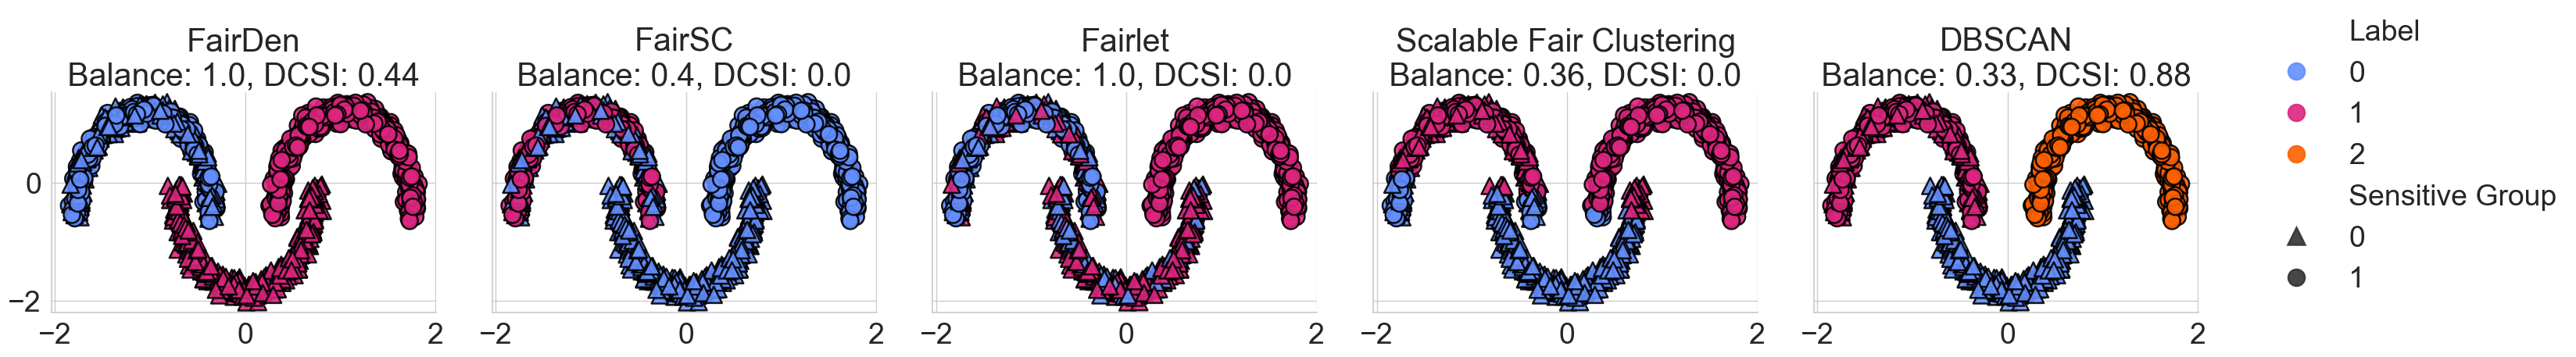

In [10]:
plot_moons(data,label_dict,sensitive)